# Image IPP coding

In [47]:
sequence = "akiyo"

In [48]:
!../sequences/$sequence/runme.sh

--2021-04-07 23:04:18--  https://media.xiph.org/video/derf/y4m/akiyo_cif.y4m
Cargado certificado CA '/etc/ssl/certs/ca-certificates.crt'
Resolviendo media.xiph.org (media.xiph.org)... 2607:5300:203:2965::, 54.39.18.101
Conectando con media.xiph.org (media.xiph.org)[2607:5300:203:2965::]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 45621044 (44M) [application/octet-stream]
Grabando a: «akiyo_cif.y4m»

akiyo_cif.y4m       100%[===================>]  43,51M  6,45MB/s    en 18s     

2021-04-07 23:04:38 (2,37 MB/s) - «akiyo_cif.y4m» guardado [45621044/45621044]

ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enabl

## Without I-type blocks

In [51]:
!sed -z -i 's/\n#import image_IPP as IPP\n/\nimport image_IPP as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as IPP\n/\n#import image_IPP_adaptive as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as IPP\n/\n#import MP4 as IPP\n/g' RD_curve.py

In [54]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
import image_IPP as IPP
#import image_IPP_adaptive as IPP
#import MP4 as IPP


In [55]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.07911668771043771 KBPS: 721.848 Average AMSE: 10.982899524761503
     2	Q_step: 22 BPP: 0.07092978395061729 KBPS: 647.152 Average AMSE: 12.053593991126542
     3	Q_step: 23 BPP: 0.06487882295173962 KBPS: 591.944 Average AMSE: 13.32535138713524
     4	Q_step: 24 BPP: 0.05912598204264871 KBPS: 539.456 Average AMSE: 15.046137481586701
     5	Q_step: 25 BPP: 0.054549838664422 KBPS: 497.704 Average AMSE: 17.03821735146605
     6	Q_step: 26 BPP: 0.04982726571268238 KBPS: 454.616 Average AMSE: 19.445175386679296
     7	Q_step: 27 BPP: 0.046258592873176206 KBPS: 422.056 Average AMSE: 22.681290333894502
     8	Q_step: 28 BPP: 0.04302925084175084 KBPS: 392.592 Average AMSE: 25.220179003577435
     9	Q_step: 29 BPP: 0.04009978254769921 KBPS: 365.864 Average AMSE: 28.759305950126265
    10	Q_step: 30 BPP: 0.037601711560044895 KBPS: 343.072 Average AMSE: 33.11114958175505
    11	Q_step: 31 BPP: 0.03561658249158249 KBPS: 324.96 Average AMSE: 37.551702134189114
    12	Q_step:

In [56]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_no_intrablocks.txt

In [57]:
!cat /tmp/curve_no_intrablocks.txt

0.07911668771043771	10.982899524761503
0.07092978395061729	12.053593991126542
0.06487882295173962	13.32535138713524
0.05912598204264871	15.046137481586701
0.054549838664422	17.03821735146605
0.04982726571268238	19.445175386679296
0.046258592873176206	22.681290333894502
0.04302925084175084	25.220179003577435
0.04009978254769921	28.759305950126265
0.037601711560044895	33.11114958175505
0.03561658249158249	37.551702134189114
0.03416982323232323	43.69153547190656
0.03254156144781145	50.452893518518515
0.031225448933782266	57.241263437324626
0.029736602132435466	66.26102737443883
0.02951564253647587	76.46080038667928
0.028294226992143658	86.54504232866863
0.027776900953984288	97.80924851816779
0.027035984848484847	112.75621963997614
0.026707175925925926	126.48899805345114
0.02646517255892256	144.524414172103


In [58]:
RD_points_no_intrablocks = []
with open("/tmp/curve_no_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_no_intrablocks.append((float(rate), float(_distortion)))

## With I-type blocks

In [59]:
!sed -z -i 's/\nimport image_IPP as IPP/\n#import image_IPP as IPP/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as IPP\n/\nimport image_IPP_adaptive as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as IPP\n/\n#import MP4 as IPP\n/g' RD_curve.py

In [60]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
#import image_IPP as IPP
import image_IPP_adaptive as IPP
#import MP4 as IPP


In [61]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.09193585157126823 KBPS: 838.808 Average AMSE: 11.987345569409372
     2	Q_step: 22 BPP: 0.0845038930976431 KBPS: 771.0 Average AMSE: 13.71217897288861
     3	Q_step: 23 BPP: 0.07769184904601571 KBPS: 708.848 Average AMSE: 14.972184299593154
     4	Q_step: 24 BPP: 0.07246597923681258 KBPS: 661.168 Average AMSE: 17.23006234217172
     5	Q_step: 25 BPP: 0.06907705527497193 KBPS: 630.2479999999999 Average AMSE: 20.259909424102137
     6	Q_step: 26 BPP: 0.06603623035914702 KBPS: 602.504 Average AMSE: 23.710058374544055
     7	Q_step: 27 BPP: 0.06499631734006733 KBPS: 593.0160000000001 Average AMSE: 27.870450380541524
     8	Q_step: 28 BPP: 0.06442287457912459 KBPS: 587.784 Average AMSE: 34.667447478254765
     9	Q_step: 29 BPP: 0.0628042578563412 KBPS: 573.0160000000001 Average AMSE: 40.64713980078564
    10	Q_step: 30 BPP: 0.06239390432098765 KBPS: 569.272 Average AMSE: 48.09084552118406
    11	Q_step: 31 BPP: 0.0621966189674523 KBPS: 567.472 Average AMSE: 57.79257

In [62]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_with_intrablocks.txt

In [63]:
!cat /tmp/curve_with_intrablocks.txt

0.09193585157126823	11.987345569409372
0.0845038930976431	13.71217897288861
0.07769184904601571	14.972184299593154
0.07246597923681258	17.23006234217172
0.06907705527497193	20.259909424102137
0.06603623035914702	23.710058374544055
0.06499631734006733	27.870450380541524
0.06442287457912459	34.667447478254765
0.0628042578563412	40.64713980078564
0.06239390432098765	48.09084552118406
0.0621966189674523	57.79257450810186
0.061080422278338944	67.89910629734847
0.05972046857463524	78.51994927574356
0.05936447811447811	92.69663825757577
0.05892343574635241	108.59563144465488
0.05831404320987655	128.16788556134262
0.05641308922558922	144.25783157091752
0.05450161335578002	158.09097145500132
0.05246562850729517	174.0740747316919
0.05090663580246913	188.4483600106972
0.04989653479236813	205.37752799259962


In [64]:
RD_points_with_intrablocks = []
with open("/tmp/curve_with_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_with_intrablocks.append((float(rate), float(_distortion)))

## MP4

In [65]:
!sed -z -i 's/\nimport image_IPP as IPP/\n#import image_IPP as IPP/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as IPP\n/\n#import image_IPP_adaptive as IPP\n/g' RD_curve.py
!sed -z -i 's/\n#import MP4 as IPP\n/\nimport MP4 as IPP\n/g' RD_curve.py

In [66]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
#import image_IPP as IPP
#import image_IPP_adaptive as IPP
import MP4 as IPP


In [67]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-libzimg --enable-nvdec --ena

frame=   30 fps=0.0 q=-1.0 Lsize=      25kB time=00:00:01.16 bitrate= 173.3kbits/s speed=9.92x    
video:24kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 3.988085%
[libx264 @ 0x560327ffc5c0] frame I:1     Avg QP:20.68  size:  9986
[libx264 @ 0x560327ffc5c0] frame P:29    Avg QP:24.56  size:   468
[libx264 @ 0x560327ffc5c0] mb I  I16..4: 12.4% 58.1% 29.5%
[libx264 @ 0x560327ffc5c0] mb P  I16..4:  0.0%  0.0%  0.0%  P16..4: 13.2%  6.2%  3.5%  0.0%  0.0%    skip:77.1%
[libx264 @ 0x560327ffc5c0] 8x8 transform intra:58.1% inter:57.3%
[libx264 @ 0x560327ffc5c0] coded y,u,v intra: 79.5% 43.1% 34.2% inter: 4.9% 0.4% 0.3%
[libx264 @ 0x560327ffc5c0] i16 v,h,dc,p: 45% 41%  0% 14%
[libx264 @ 0x560327ffc5c0] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 25% 25% 15%  5%  5%  6%  4%  7%  6%
[libx264 @ 0x560327ffc5c0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 35% 12% 13%  5%  6% 11%  5%  9%  4%
[libx264 @ 0x560327ffc5c0] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x560327ffc5c0] ref P L0: 64.4

Stream mapping:
  Stream #0:0 -> #0:0 (h264 (native) -> png (native))
Press [q] to stop, [?] for help
Output #0, image2, to '/tmp/original_reconstructed_%03d.png':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.45.100
    Stream #0:0(und): Video: png, rgb24, 352x288 [SAR 128:117 DAR 1408:1053], q=2-31, 200 kb/s, 25 fps, 25 tbn, 25 tbc (default)
    Metadata:
      handler_name    : VideoHandler
      encoder         : Lavc58.91.100 png
frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=5.67x    
video:3830kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls

Input #0, image2, from '/tmp/original_%03d.png':
  Duration: 00:00:12.00, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgb24(pc), 352x288 [SAR 128:117 DAR 1408:1053], 25 fps, 25 tbr, 25 tbn, 25 tbc
Stream mapping:
  Stream #0:0 -> #0:0 (png (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x55f8b00d55c0] using SAR=128/117
[libx264 @ 0x55f8b00d55c0] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x55f8b00d55c0] profile High 4:4:4 Predictive, level 1.3, 4:4:4, 8-bit
[libx264 @ 0x55f8b00d55c0] 264 - core 160 r3011 cde9a93 - H.264/MPEG-4 AVC codec - Copyleft 2003-2020 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=9 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=

frame=   30 fps=0.0 q=-1.0 Lsize=      14kB time=00:00:01.16 bitrate=  99.3kbits/s speed=7.38x    
video:13kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 7.172085%
[libx264 @ 0x56440298a5c0] frame I:1     Avg QP:24.68  size:  6373
[libx264 @ 0x56440298a5c0] frame P:29    Avg QP:28.46  size:   222
[libx264 @ 0x56440298a5c0] mb I  I16..4: 17.9% 51.3% 30.8%
[libx264 @ 0x56440298a5c0] mb P  I16..4:  0.0%  0.0%  0.0%  P16..4:  8.9%  3.8%  1.6%  0.0%  0.0%    skip:85.7%
[libx264 @ 0x56440298a5c0] 8x8 transform intra:51.3% inter:71.8%
[libx264 @ 0x56440298a5c0] coded y,u,v intra: 62.2% 27.1% 21.5% inter: 1.8% 0.2% 0.1%
[libx264 @ 0x56440298a5c0] i16 v,h,dc,p: 42% 37%  6% 15%
[libx264 @ 0x56440298a5c0] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 28% 25% 13%  4%  4%  8%  5%  7%  7%
[libx264 @ 0x56440298a5c0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 38% 18%  9%  4%  6%  9%  4%  8%  3%
[libx264 @ 0x56440298a5c0] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x56440298a5c0] ref P L0: 71.3

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=10.3x    
video:3483kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

Input #0, image2, from '/tmp/original_%03d.png':
  Duration: 00:00:12.00, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgb24(pc), 352x288 [SAR 128:117 DAR 1408:1053], 25 fps, 25 tbr, 25 tbn, 25 tbc
Stream mapping:
  Stream #0:0 -> #0:0 (png (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x55d2b2aba5c0] using SAR=128/117
[libx264 @ 0x55d2b2aba5c0] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x55d2b2aba5c0] profile High 4:4:4 Predictive, level 1.3, 4:4:4, 8-bit
[libx264 @ 0x55d2b2aba5c0] 264 - core 160 r3011 cde9a93 - H.264/MPEG-4 AVC codec - Copyleft 2003-2020 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=9 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=

frame=   30 fps=0.0 q=-1.0 Lsize=       9kB time=00:00:01.16 bitrate=  64.7kbits/s speed=   9x    
video:8kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 11.458457%
[libx264 @ 0x55f5263a85c0] frame I:1     Avg QP:28.69  size:  4333
[libx264 @ 0x55f5263a85c0] frame P:29    Avg QP:32.25  size:   119
[libx264 @ 0x55f5263a85c0] mb I  I16..4: 20.2% 62.1% 17.7%
[libx264 @ 0x55f5263a85c0] mb P  I16..4:  0.0%  0.0%  0.0%  P16..4:  6.4%  1.7%  0.8%  0.0%  0.0%    skip:91.1%
[libx264 @ 0x55f5263a85c0] 8x8 transform intra:62.1% inter:78.9%
[libx264 @ 0x55f5263a85c0] coded y,u,v intra: 49.4% 18.5% 14.7% inter: 0.7% 0.1% 0.1%
[libx264 @ 0x55f5263a85c0] i16 v,h,dc,p: 46% 34%  8% 12%
[libx264 @ 0x55f5263a85c0] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 32% 25% 12%  4%  4%  7%  4%  8%  4%
[libx264 @ 0x55f5263a85c0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 34% 20% 12%  5%  5%  7%  6%  6%  5%
[libx264 @ 0x55f5263a85c0] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x55f5263a85c0] ref P L0: 74.1

Output #0, image2, to '/tmp/original_reconstructed_%03d.png':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.45.100
    Stream #0:0(und): Video: png, rgb24, 352x288 [SAR 128:117 DAR 1408:1053], q=2-31, 200 kb/s, 25 fps, 25 tbn, 25 tbc (default)
    Metadata:
      handler_name    : VideoHandler
      encoder         : Lavc58.91.100 png
frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=11.8x    
video:3380kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --e

frame=   30 fps=0.0 q=-1.0 Lsize=       7kB time=00:00:01.16 bitrate=  50.3kbits/s speed=14.2x    
video:6kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 15.214646%
[libx264 @ 0x5615cc8f75c0] frame I:1     Avg QP:31.79  size:  3301
[libx264 @ 0x5615cc8f75c0] frame P:29    Avg QP:35.08  size:    83
[libx264 @ 0x5615cc8f75c0] mb I  I16..4: 25.8% 54.3% 19.9%
[libx264 @ 0x5615cc8f75c0] mb P  I16..4:  0.0%  0.0%  0.0%  P16..4:  5.5%  1.0%  0.3%  0.0%  0.0%    skip:93.2%
[libx264 @ 0x5615cc8f75c0] 8x8 transform intra:54.3% inter:85.2%
[libx264 @ 0x5615cc8f75c0] coded y,u,v intra: 40.9% 16.7% 11.1% inter: 0.4% 0.1% 0.0%
[libx264 @ 0x5615cc8f75c0] i16 v,h,dc,p: 39% 36%  6% 19%
[libx264 @ 0x5615cc8f75c0] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 32% 21% 17%  3%  4%  7%  4%  7%  5%
[libx264 @ 0x5615cc8f75c0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 44% 15% 11%  5%  5%  6%  3%  7%  3%
[libx264 @ 0x5615cc8f75c0] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x5615cc8f75c0] ref P L0: 76.5

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '/tmp/output.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.45.100
  Duration: 00:00:01.20, start: 0.000000, bitrate: 45 kb/s
    Stream #0:0(und): Video: h264 (High 4:4:4 Predictive) (avc1 / 0x31637661), yuv444p, 352x288 [SAR 128:117 DAR 1408:1053], 39 kb/s, 25 fps, 25 tbr, 12800 tbn, 50 tbc (default)
    Metadata:
      handler_name    : VideoHandler
Stream mapping:
  Stream #0:0 -> #0:0 (h264 (native) -> png (native))
Press [q] to stop, [?] for help
Output #0, image2, to '/tmp/original_reconstructed_%03d.png':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.45.100
    Stream #0:0(und): Video: png, rgb24, 352x288 [SAR 128:117 DAR 1408:1053], q=2-31, 200 kb/s, 25 fps, 25 tbn, 25 tbc (default)
    Metadata:
      handler_name    : VideoHandler
      encoder         : Lav

frame=   30 fps=0.0 q=-1.0 Lsize=       6kB time=00:00:01.16 bitrate=  41.4kbits/s speed=14.6x    
video:5kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 19.150625%
[libx264 @ 0x55892f97c5c0] frame I:1     Avg QP:34.76  size:  2532
[libx264 @ 0x55892f97c5c0] frame P:29    Avg QP:37.76  size:    65
[libx264 @ 0x55892f97c5c0] mb I  I16..4: 22.7% 64.4% 12.9%
[libx264 @ 0x55892f97c5c0] mb P  I16..4:  0.0%  0.0%  0.0%  P16..4:  5.0%  0.4%  0.5%  0.0%  0.0%    skip:94.0%
[libx264 @ 0x55892f97c5c0] 8x8 transform intra:64.4% inter:87.5%
[libx264 @ 0x55892f97c5c0] coded y,u,v intra: 35.1% 13.4% 10.4% inter: 0.2% 0.0% 0.0%
[libx264 @ 0x55892f97c5c0] i16 v,h,dc,p: 29% 36% 16% 20%
[libx264 @ 0x55892f97c5c0] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 37% 21% 15%  4%  3%  6%  4%  7%  4%
[libx264 @ 0x55892f97c5c0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 42% 15% 12%  5%  4%  8%  4%  7%  2%
[libx264 @ 0x55892f97c5c0] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x55892f97c5c0] ref P L0: 84.7

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=11.1x    
video:3107kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

frame=   30 fps=0.0 q=-1.0 Lsize=       5kB time=00:00:01.16 bitrate=  36.2kbits/s speed=14.3x    
video:4kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 22.509914%
[libx264 @ 0x562d464f65c0] frame I:1     Avg QP:38.00  size:  1910
[libx264 @ 0x562d464f65c0] frame P:29    Avg QP:40.60  size:    60
[libx264 @ 0x562d464f65c0] mb I  I16..4: 16.9% 73.7%  9.3%
[libx264 @ 0x562d464f65c0] mb P  I16..4:  0.0%  0.0%  0.0%  P16..4:  3.9%  1.7%  0.9%  0.0%  0.0%    skip:93.6%
[libx264 @ 0x562d464f65c0] 8x8 transform intra:73.6% inter:86.8%
[libx264 @ 0x562d464f65c0] coded y,u,v intra: 29.2% 11.9% 9.6% inter: 0.1% 0.0% 0.0%
[libx264 @ 0x562d464f65c0] i16 v,h,dc,p: 43% 29% 10% 18%
[libx264 @ 0x562d464f65c0] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 40% 25% 14%  3%  2%  4%  4%  5%  3%
[libx264 @ 0x562d464f65c0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 43% 12% 12%  6%  8%  9%  3%  6%  1%
[libx264 @ 0x562d464f65c0] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x562d464f65c0] ref P L0: 92.5%

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=12.3x    
video:3035kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

In [68]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_MP4.txt

In [69]:
!cat /tmp/curve_MP4.txt

0.02589699074074074	8.588182607323233
0.022039842873176205	9.612982581895341
0.018821022727272728	10.619716040614481
0.01640098905723906	11.930307414421996
0.014464085297418631	13.273592917017394
0.012630646745230078	14.865637494739056
0.011327686588103255	16.42304018921858
0.010098379629629629	18.556729403409097
0.0091636854657688	20.765989868301062
0.008221976711560044	23.22380543718435
0.007435465768799102	25.829867139274693
0.0069260311447811446	28.670149081965494
0.0064008136924803595	32.20979653303872
0.005978184624017957	35.96595654899692
0.005634469696969697	40.471789400077164
0.005264450056116723	45.87911241319444
0.005026830808080808	49.833525796156
0.00461121632996633	55.60545406320146
0.004605078563411896	64.35902196882016
0.004450757575757576	70.60827513415403
0.004189464085297419	79.11686044472502


In [70]:
RD_points_MP4 = []
with open("/tmp/curve_MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_MP4.append((float(rate), float(_distortion)))

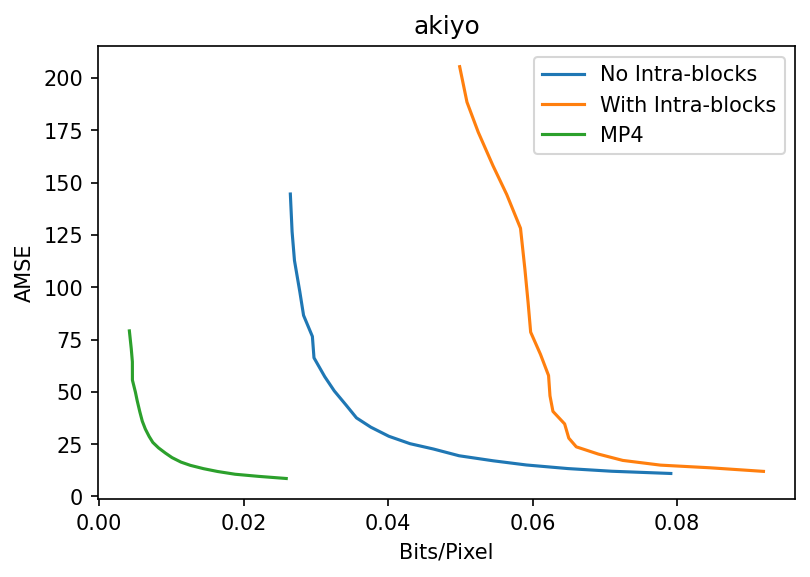

In [71]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()